In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from scipy import stats
import random
from scipy.signal import find_peaks

In [38]:
root_dir = "E:\HP_Pranu\Fall21\VIZ\project"
list_dir =sorted(os.listdir(root_dir))
list_dir

['Readme.txt',
 'all_accelerometer_data_pids_13.csv',
 'clean_tac',
 'phone_types.csv',
 'pids.txt',
 'raw_tac',
 '~$am3_Proposal.docx']

In [3]:
os.chdir(root_dir)
dataFile = list_dir[1]
data = pd.read_csv(dataFile)
data.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [4]:
data.shape

(14057567, 5)

In [5]:
data['time'].dtype

dtype('int64')

## Clean data and drop rows where timestamp is 0 . Order the data in ascending order of user and timestamp

In [6]:
data = data[data['time'] != 0]
data = data.sort_values(by=['pid','time'],ignore_index=True)

In [7]:
data.head()

,time,pid,x,y,z
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447
3,1493735870729,BK7610,0.1255,-0.0038,0.0111
4,1493735870753,BK7610,0.1076,0.0032,0.0276


## Read the TAC readings file

In [8]:
os.chdir(root_dir)
tac_dir = "/clean_tac"
os.chdir(root_dir + tac_dir)
tacLsdir = os.listdir()
tacs = {}
for pid_csv in tacLsdir:
    pid = pid_csv[:6]
    # print(pid)
    tacs[pid] = pd.read_csv(pid_csv)

In [9]:
# tacs
pid_acc_data={}
pids = list(tacs.keys())
for pid in pids:
    pid_acc_data[pid] = data[data['pid']==pid]

In [10]:
pid_acc_data['BK7610']

,time,pid,x,y,z
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447
3,1493735870729,BK7610,0.1255,-0.0038,0.0111
4,1493735870753,BK7610,0.1076,0.0032,0.0276
...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162


In [11]:
all_data = []
for pid in pids:
    df1 = tacs[pid]
#     Shift TAC reading by 45 minutes before merging with accelerometer data
    # df1['shift_timestamp'] = df1['timestamp'] - (45*60)
    df2 = data[data['pid']==pid]
#     Change timestamp in accelerometer data from milisec to sec
    df2['timestamp'] = df2['time']//1000 
#     Merge the TAC reading and accelerometer data on timestamp
    tmp = df1.merge(df2, on= 'timestamp')
    tmp['label'] = np.where(tmp['TAC_Reading']<0.08, 0, 1)

    all_data.append(tmp)
large_df = pd.concat(all_data)

<ipython-input-11-743ea1c55821>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = df2['time']//1000


In [12]:
large_df.head()

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493737046,0.065357,1493737046023,BK7610,0.1410,-0.2686,-0.1372,0
1,1493737046,0.065357,1493737046063,BK7610,0.1714,-0.2722,-0.1208,0
2,1493737046,0.065357,1493737046073,BK7610,0.3328,-0.1353,-0.2548,0
3,1493737046,0.065357,1493737046101,BK7610,0.2822,-0.0375,-0.2816,0
4,1493737046,0.065357,1493737046134,BK7610,0.1847,0.1813,-0.2680,0


<ipython-input-13-170ba00cb360>:3: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=large_df[large_df['pid']=="BK7610"])
<ipython-input-13-170ba00cb360>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=large_df[large_df['pid']=="BK7610"])


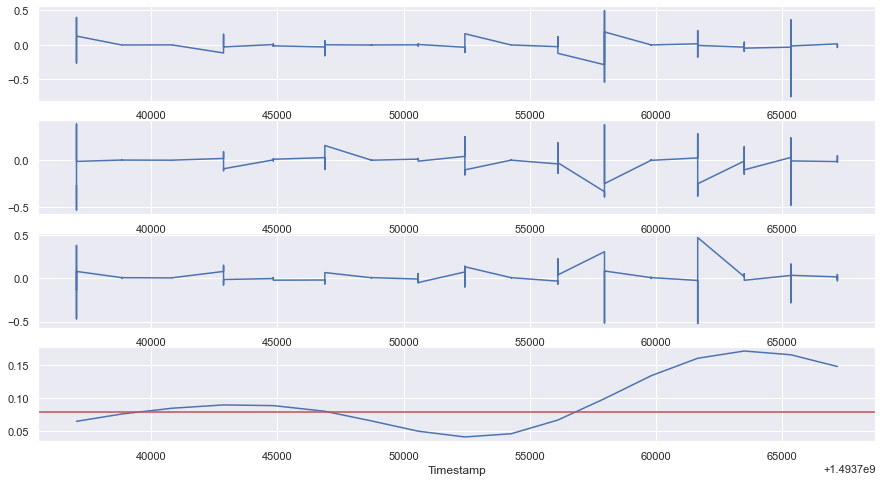

In [13]:
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=large_df[large_df['pid']=="BK7610"])
ax[1].plot("timestamp","y",data=large_df[large_df['pid']=="BK7610"])
ax[2].plot("timestamp","z",data=large_df[large_df['pid']=="BK7610"])
ax[3].plot("timestamp",'TAC_Reading', data=large_df[large_df['pid']=="BK7610"])
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

In [14]:
large_df.timestamp.dtype

dtype('int64')

##  Sampling for 800 rows -> 20 seconds of timestamp 

<ipython-input-15-cb14841ac0ac>:5: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=zoomed)
<ipython-input-15-cb14841ac0ac>:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=zoomed)


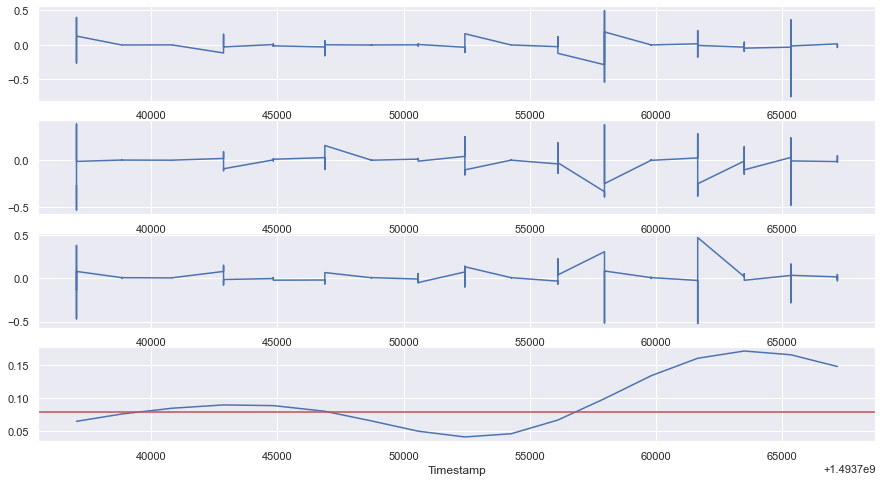

In [15]:
BK7 = large_df[large_df['pid']=="BK7610"]
zoomed = BK7[:800]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=zoomed)
ax[1].plot("timestamp","y",data=zoomed)
ax[2].plot("timestamp","z",data=zoomed)
ax[3].plot("timestamp",'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

<ipython-input-16-19629a461386>:7: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(time,"x",data=zoomed)
<ipython-input-16-19629a461386>:9: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(time,"y",data=zoomed)


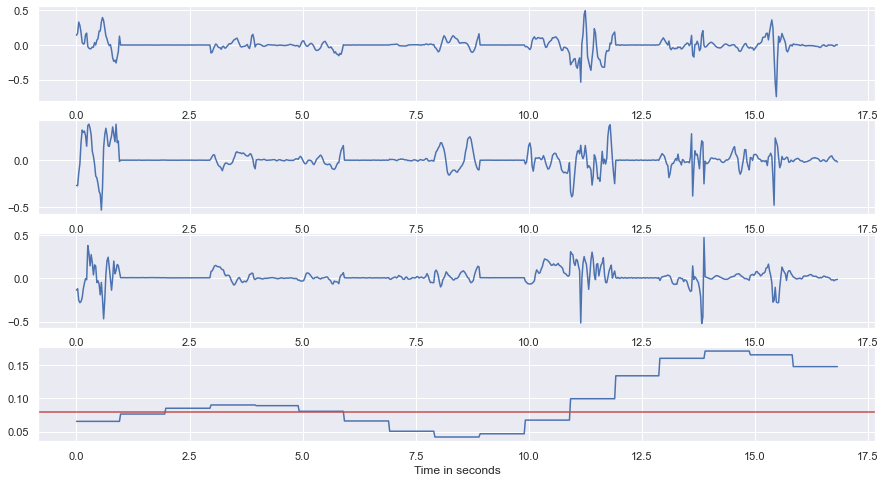

In [16]:
sampling_freq = 40
BK7 = large_df[large_df['pid']=="BK7610"]
zoomed = BK7[:800]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Time in seconds")
time = np.arange(zoomed['x'].size)/sampling_freq
ax[0].plot(time,"x",data=zoomed)
# ax[0].label(y="x axis")
ax[1].plot(time,"y",data=zoomed)
# plt.ylabel("y axis")
ax[2].plot(time,"z",data=zoomed)
# plt.ylabel("z axis")
ax[3].plot(time,'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

Zooming on 10 seconds

<ipython-input-17-c8f1ed5c67c7>:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=zoomed)
<ipython-input-17-c8f1ed5c67c7>:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=zoomed)


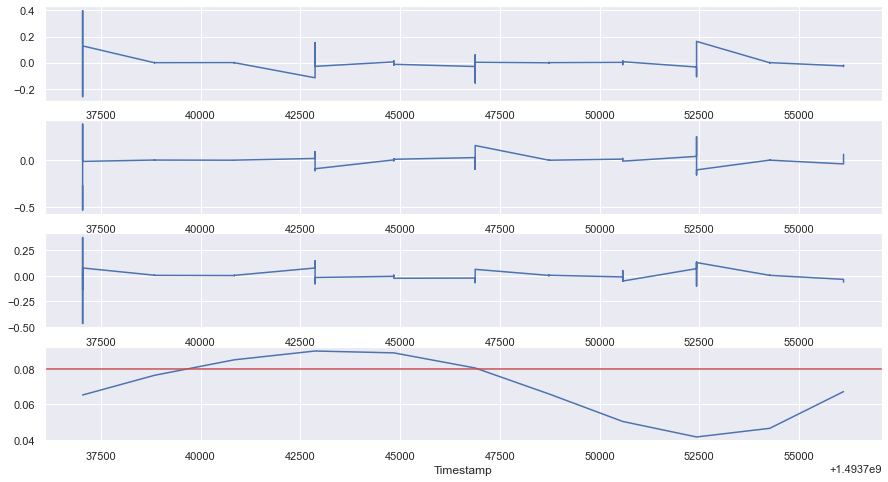

In [17]:
zoomed = BK7[:400]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=zoomed)
ax[1].plot("timestamp","y",data=zoomed)
ax[2].plot("timestamp","z",data=zoomed)
ax[3].plot("timestamp",'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

<ipython-input-18-e2abf304d28f>:5: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(time,"x",data=zoomed)
<ipython-input-18-e2abf304d28f>:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(time,"y",data=zoomed)


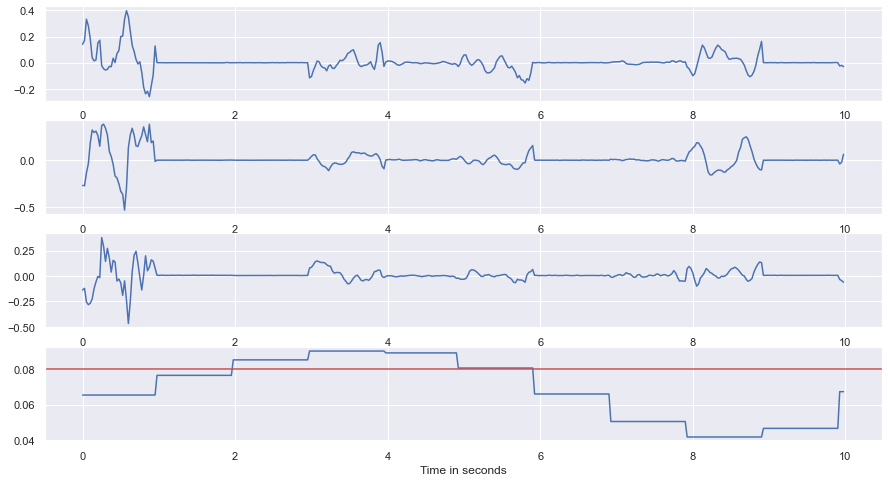

In [18]:
sampling_freq = 40
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Time in seconds")
time = np.arange(zoomed['x'].size)/sampling_freq
ax[0].plot(time,"x",data=zoomed)
ax[1].plot(time,"y",data=zoomed)
ax[2].plot(time,"z",data=zoomed)
ax[3].plot(time,'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

### Spliting Training & Test according to participants

In [19]:
participants = list(pids)
print(participants)

['BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SA0297', 'SF3079']


In [20]:
random.seed(100)
def Diff(li1, li2):
  return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

In [21]:
p_tr_index = random.sample(range(1, 13), 9)  # 70%13 = 9.1~9
p_te_index = Diff(list(range(1, 13)),p_tr_index)  #30%13 = 3.9~4

In [22]:
p_tr_index

[3, 8, 11, 12, 7, 6, 9, 4, 1]

In [23]:
p_te=[]
p_tr = []
for index in p_tr_index:
    p_tr.append(participants[index])
for index in p_te_index:
    p_te.append(participants[index])

In [24]:
p_tr

['DC6359',
 'MC7070',
 'SA0297',
 'SF3079',
 'JR8022',
 'JB3156',
 'MJ8002',
 'DK3500',
 'BU4707']

In [25]:
df_train = pd.DataFrame()
for pid in p_tr:
    tmp = large_df[large_df["pid"]==pid]
    df_train = df_train.append(tmp)

In [26]:
df_train

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493748079,0.122072,1493748079007,DC6359,0.0081,-0.0063,-0.0106,1
1,1493748079,0.122072,1493748079039,DC6359,0.0069,-0.0109,-0.0092,1
2,1493748079,0.122072,1493748079059,DC6359,-0.0012,-0.0004,0.0076,1
3,1493748079,0.122072,1493748079097,DC6359,-0.0098,0.0121,-0.0065,1
4,1493748079,0.122072,1493748079118,DC6359,-0.0103,0.0298,0.0124,1
...,...,...,...,...,...,...,...,...
232,1493754265,0.046559,1493754265899,BU4707,-0.1110,0.0593,-0.0076,0
233,1493754265,0.046559,1493754265924,BU4707,-0.0346,0.0581,0.0428,0
234,1493754265,0.046559,1493754265949,BU4707,-0.0171,0.0288,0.0553,0
235,1493754265,0.046559,1493754265974,BU4707,-0.0354,-0.0062,0.0595,0


In [27]:
df_test = pd.DataFrame()
for pid in p_te:
    tmp = large_df[large_df["pid"]==pid]
    df_test = df_test.append(tmp)

In [28]:
df_test

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493741188,0.041870,1493741188015,CC6740,-4.696118,-16.039703,6.315768,0
1,1493741188,0.041870,1493741188039,CC6740,-8.342324,-6.281204,-9.354126,0
2,1493741188,0.041870,1493741188065,CC6740,-6.992756,-1.318486,-8.665682,0
3,1493741188,0.041870,1493741188089,CC6740,-6.556036,1.632029,-3.295139,0
4,1493741188,0.041870,1493741188217,CC6740,-7.352158,2.141843,2.943863,0
...,...,...,...,...,...,...,...,...
595,1493805699,0.006193,1493805699881,HV0618,-0.001300,0.000000,0.006300,0
596,1493805699,0.006193,1493805699905,HV0618,-0.001000,-0.000100,0.007500,0
597,1493805699,0.006193,1493805699932,HV0618,-0.001100,-0.000600,0.006100,0
598,1493805699,0.006193,1493805699957,HV0618,-0.001300,0.000200,0.007100,0


# Window size = 5 seconds 
5 seconds = 40*5 samples = 200 samples
<br>
step_size = 25 (Since the data is taken at 25 miliseconds)

In [48]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 200
step_size = 5

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 200]
    ys = df_train['y'].values[i: i + 200]
    zs = df_train['z'].values[i: i + 200]
    label = (df_train['label'][i: i + 200]).max()
    #print(label)

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [49]:
len(train_labels)

616

In [50]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [51]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/200)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/200)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/200))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/200)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/200)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/200))

In [52]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,1.237656,-0.060987,7.819703,8.777219,1.991038,0.000377,0.000266,0.000487,0.024102,0.036593
1,0.002883,-0.004416,0.001612,0.019187,0.015537,0.022002,0.010919,0.009547,0.015062,-0.0912,...,1.268900,-0.093856,7.887388,9.415836,2.014686,0.000376,0.000261,0.000487,0.023929,0.036275
2,0.002633,-0.004293,0.002007,0.019104,0.015371,0.021908,0.010693,0.009313,0.014851,-0.0912,...,1.298819,-0.132645,8.008249,9.875760,2.089405,0.000372,0.000255,0.000484,0.023615,0.035775
3,0.002035,-0.003728,0.002136,0.018587,0.014845,0.021723,0.010173,0.008852,0.014568,-0.0912,...,1.558056,-0.171748,8.727759,10.805170,2.229292,0.000350,0.000234,0.000476,0.022843,0.034596
4,0.001794,-0.003633,0.002268,0.018506,0.014761,0.021626,0.010010,0.008702,0.014303,-0.0912,...,1.578866,-0.193629,8.855410,11.061431,2.322940,0.000346,0.000231,0.000473,0.022530,0.034132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.001396,0.023004,0.015380,0.060439,0.087952,0.065721,0.034267,0.058378,0.046697,-0.2881,...,0.570633,0.264091,5.177883,3.677856,1.694124,0.003655,0.008265,0.004556,0.090592,0.131798
612,-0.000062,0.022905,0.014707,0.060200,0.087984,0.066043,0.034244,0.058440,0.047098,-0.2881,...,0.573063,0.280980,5.263226,3.670797,1.623265,0.003624,0.008266,0.004578,0.090619,0.131872
613,-0.003228,0.022071,0.014339,0.063502,0.088263,0.066273,0.037566,0.058924,0.047344,-0.2881,...,0.592344,0.286884,4.348123,3.610753,1.573993,0.004043,0.008278,0.004598,0.093130,0.135095
614,0.001535,0.021053,0.011612,0.070532,0.089060,0.066631,0.040150,0.059718,0.046476,-0.2881,...,0.587185,0.337648,4.548992,3.436640,1.592303,0.004977,0.008375,0.004575,0.095963,0.139145


In [53]:
len(x_list)

616

# Fourier Transform

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


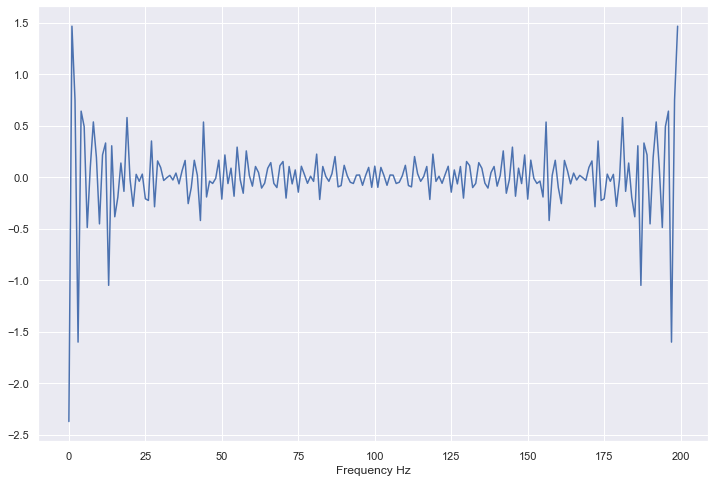

In [54]:
pd.Series(np.fft.fft(pd.Series(x_list)[42])).plot()
plt.xlabel("Frequency Hz")
plt.show()

##### the signal is symmetric about the center, so we can take only first half of the wave

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


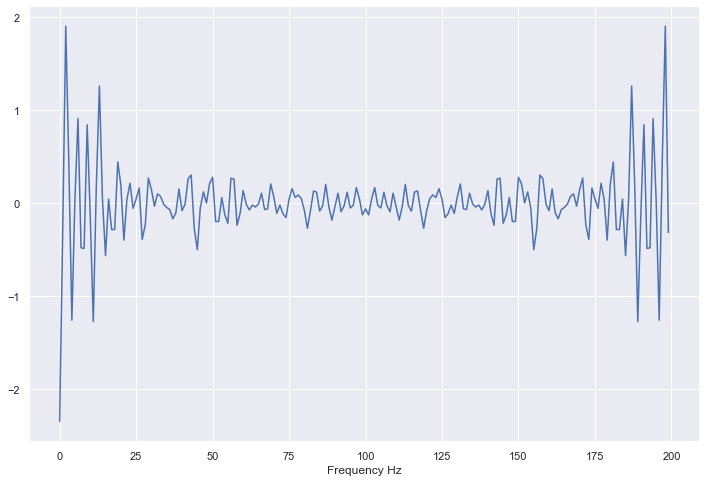

In [55]:
pd.Series(np.fft.fft(pd.Series(x_list)[25])).plot()
plt.xlabel("Frequency Hz")
plt.show()

In [56]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [57]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,0.300536,0.259187,-1.146063,-0.248213,-1.091532,0.243707,0.135577,0.341467,0.804457,1.265199
1,0.002883,-0.004416,0.001612,0.019187,0.015537,0.022002,0.010919,0.009547,0.015062,-0.0912,...,0.308514,0.247965,-1.156158,-0.483124,-1.151835,0.243535,0.131012,0.341704,0.799276,1.260457
2,0.002633,-0.004293,0.002007,0.019104,0.015371,0.021908,0.010693,0.009313,0.014851,-0.0912,...,0.412433,0.265169,-1.090658,-0.469397,-1.168940,0.242542,0.132126,0.341808,0.799480,1.266680
3,0.002035,-0.003728,0.002136,0.018587,0.014845,0.021723,0.010173,0.008852,0.014568,-0.0912,...,-0.127698,0.268172,-0.562094,-0.210354,-1.221623,0.229152,0.125804,0.343651,0.787308,1.256478
4,0.001794,-0.003633,0.002268,0.018506,0.014761,0.021626,0.010010,0.008702,0.014303,-0.0912,...,-0.159168,0.226427,-0.520531,-0.431284,-1.211304,0.228062,0.125570,0.343060,0.786956,1.256753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.001396,0.023004,0.015380,0.060439,0.087952,0.065721,0.034267,0.058378,0.046697,-0.2881,...,0.239423,0.474255,-0.880052,-0.877027,-0.429560,1.983416,5.203706,2.820657,3.050875,4.799467
612,-0.000062,0.022905,0.014707,0.060200,0.087984,0.066043,0.034244,0.058440,0.047098,-0.2881,...,0.236240,0.486217,-1.328453,-0.886477,-0.079742,1.965909,5.206723,2.852875,3.052438,4.834538
613,-0.003228,0.022071,0.014339,0.063502,0.088263,0.066273,0.037566,0.058924,0.047344,-0.2881,...,0.211023,0.361509,-0.779195,-0.924900,-0.392899,2.226662,5.243964,2.860951,3.118245,4.975668
614,0.001535,0.021053,0.011612,0.070532,0.089060,0.066631,0.040150,0.059718,0.046476,-0.2881,...,0.117244,0.000747,-0.825379,-0.777947,-0.528903,2.708479,5.311458,2.794518,3.182007,5.004021


# Transform the X_test similarly

In [58]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 200
step_size = 5

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i + 200]
    ys = df_test['y'].values[i: i + 200]
    zs = df_test['z'].values[i: i + 200]
    label = (df_test['label'][i: i + 200]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [59]:
len(test_labels)

399

In [60]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [61]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/200)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/200)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/200))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/200)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/200)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/200))

In [62]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [63]:
X_test.shape

(399, 94)

In [64]:
X_train.shape

(616, 94)

# Logistic Model


In [65]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [66]:
len(y_test)

399

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.9464285714285714

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       181
           1       0.95      0.97      0.96       435

    accuracy                           0.95       616
   macro avg       0.94      0.93      0.93       616
weighted avg       0.95      0.95      0.95       616

Accuracy is: 0.8220551378446115

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       232
           1       0.82      0.74      0.78       167

    accuracy                           0.82       399
   macro avg       0.82      0.81      0.81       399
weighted avg       0.82      0.82      0.82       399



In [68]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,0.300536,0.259187,-1.146063,-0.248213,-1.091532,0.243707,0.135577,0.341467,0.804457,1.265199
1,0.002883,-0.004416,0.001612,0.019187,0.015537,0.022002,0.010919,0.009547,0.015062,-0.0912,...,0.308514,0.247965,-1.156158,-0.483124,-1.151835,0.243535,0.131012,0.341704,0.799276,1.260457
2,0.002633,-0.004293,0.002007,0.019104,0.015371,0.021908,0.010693,0.009313,0.014851,-0.0912,...,0.412433,0.265169,-1.090658,-0.469397,-1.168940,0.242542,0.132126,0.341808,0.799480,1.266680
3,0.002035,-0.003728,0.002136,0.018587,0.014845,0.021723,0.010173,0.008852,0.014568,-0.0912,...,-0.127698,0.268172,-0.562094,-0.210354,-1.221623,0.229152,0.125804,0.343651,0.787308,1.256478
4,0.001794,-0.003633,0.002268,0.018506,0.014761,0.021626,0.010010,0.008702,0.014303,-0.0912,...,-0.159168,0.226427,-0.520531,-0.431284,-1.211304,0.228062,0.125570,0.343060,0.786956,1.256753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.001396,0.023004,0.015380,0.060439,0.087952,0.065721,0.034267,0.058378,0.046697,-0.2881,...,0.239423,0.474255,-0.880052,-0.877027,-0.429560,1.983416,5.203706,2.820657,3.050875,4.799467
612,-0.000062,0.022905,0.014707,0.060200,0.087984,0.066043,0.034244,0.058440,0.047098,-0.2881,...,0.236240,0.486217,-1.328453,-0.886477,-0.079742,1.965909,5.206723,2.852875,3.052438,4.834538
613,-0.003228,0.022071,0.014339,0.063502,0.088263,0.066273,0.037566,0.058924,0.047344,-0.2881,...,0.211023,0.361509,-0.779195,-0.924900,-0.392899,2.226662,5.243964,2.860951,3.118245,4.975668
614,0.001535,0.021053,0.011612,0.070532,0.089060,0.066631,0.040150,0.059718,0.046476,-0.2881,...,0.117244,0.000747,-0.825379,-0.777947,-0.528903,2.708479,5.311458,2.794518,3.182007,5.004021


SVM MODEL

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
svc.fit(X_train_data_lr, y_train)

SVC(kernel='linear')

In [70]:
y_pred_svm_train = svc.predict(X_train_data_lr)
y_pred_svm_test = svc.predict(X_test_data_lr)

In [71]:
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

Accuracy is: 0.9561688311688312

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       181
           1       0.96      0.97      0.97       435

    accuracy                           0.96       616
   macro avg       0.95      0.94      0.95       616
weighted avg       0.96      0.96      0.96       616



In [72]:
print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.8120300751879699

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       232
           1       0.82      0.71      0.76       167

    accuracy                           0.81       399
   macro avg       0.81      0.80      0.80       399
weighted avg       0.81      0.81      0.81       399



Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
#param = {'var_smoothing': np.logspace(0,-11,num=100)}
#gs_nb = GridSearchCV(estimator=nb, 
      #           param_grid=param, 
             #    cv=cv_method,   # use any cross validation technique 
       #          verbose=1, 
        #         scoring='accuracy')
gs_nb = nb
gs_nb.fit(X_train, y_train)

GaussianNB()

In [74]:
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)

In [75]:
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division = 0))

Accuracy is: 0.672077922077922

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.41      0.27      0.32       181
           1       0.73      0.84      0.78       435

    accuracy                           0.67       616
   macro avg       0.57      0.55      0.55       616
weighted avg       0.64      0.67      0.65       616



In [76]:
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division = 0))

Accuracy is: 0.41854636591478694

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       0.42      1.00      0.59       167

    accuracy                           0.42       399
   macro avg       0.21      0.50      0.30       399
weighted avg       0.18      0.42      0.25       399



#modelling only with frequency features# takes too long to run

#modellig with window size = 10
Window size = 10 seconds
10 seconds = 40*10 samples = 400 samples
step_size = 25 (Since the data is taken at 25 miliseconds)

In [78]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 400
step_size = 25

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 400]
    ys = df_train['y'].values[i: i + 400]
    zs = df_train['z'].values[i: i + 400]
    label = (df_train['label'][i: i + 400]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [79]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [80]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


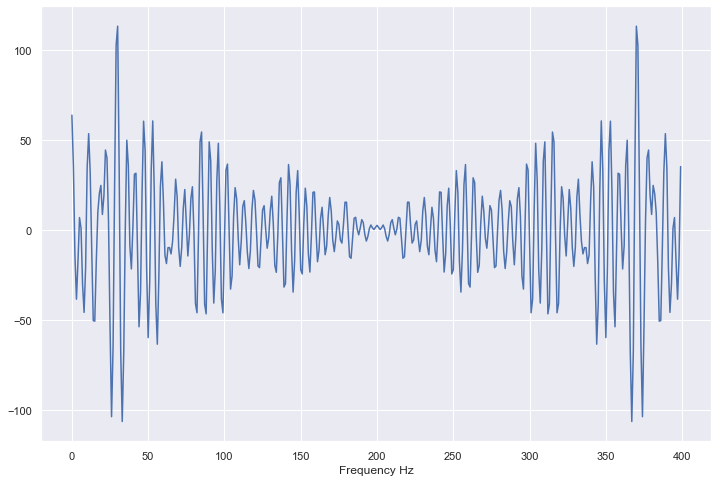

In [81]:
#FOURIER TRANSFORM
pd.Series(np.fft.fft(pd.Series(x_list)[42])).plot()
plt.xlabel("Frequency Hz")
plt.show()

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


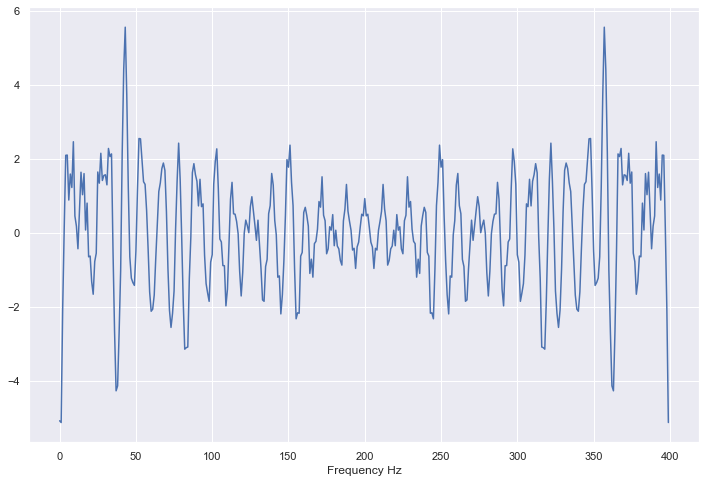

In [82]:
pd.Series(np.fft.fft(pd.Series(x_list)[25])).plot()
plt.xlabel("Frequency Hz")
plt.show()

In [83]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [85]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 400
step_size = 25

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i + 400]
    ys = df_test['y'].values[i: i + 400]
    zs = df_test['z'].values[i: i + 400]
    label = (df_test['label'][i: i + 400]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [86]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [87]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

In [88]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

In [89]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [90]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.9913793103448276

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.99      1.00      1.00       103

    accuracy                           0.99       116
   macro avg       1.00      0.96      0.98       116
weighted avg       0.99      0.99      0.99       116

Accuracy is: 0.7361111111111112

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.73      0.98      0.83        49

    accuracy                           0.74        72
   macro avg       0.78      0.60      0.59        72
weighted avg       0.76      0.74      0.68        72



In [93]:
#svm
#alternate
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred_svm_train = svc.predict(X_train)
y_pred_svm_test = svc.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.8879310344827587

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      1.00      0.94       103

    accuracy                           0.89       116
   macro avg       0.44      0.50      0.47       116
weighted avg       0.79      0.89      0.84       116

Accuracy is: 0.6805555555555556

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.68      1.00      0.81        49

    accuracy                           0.68        72
   macro avg       0.34      0.50      0.40        72
weighted avg       0.46      0.68      0.55        72



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb_train = nb.predict(X_train)
y_pred_nb_test = nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test))

Accuracy is: 0.41379310344827586

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.15      0.92      0.26        13
           1       0.97      0.35      0.51       103

    accuracy                           0.41       116
   macro avg       0.56      0.64      0.39       116
weighted avg       0.88      0.41      0.49       116

Accuracy is: 0.3194444444444444

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.32      1.00      0.48        23
           1       0.00      0.00      0.00        49

    accuracy                           0.32        72
   macro avg       0.16      0.50      0.24        72
weighted avg       0.10      0.32      0.15        72



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#modified naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
param = {'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb = GridSearchCV(estimator=nb, 
                 param_grid=param, 
             #    cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
gs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [96]:
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division=1))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division=1))

Accuracy is: 0.8879310344827587

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        13
           1       0.89      1.00      0.94       103

    accuracy                           0.89       116
   macro avg       0.94      0.50      0.47       116
weighted avg       0.90      0.89      0.84       116

Accuracy is: 0.6805555555555556

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        23
           1       0.68      1.00      0.81        49

    accuracy                           0.68        72
   macro avg       0.84      0.50      0.40        72
weighted avg       0.78      0.68      0.55        72

